In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('trial_level_2.csv')

**Measure of cognitive effort/skill?** If not swith occurs maybe that can be interpreted as either horrible performance or really good performance(both extremes) 

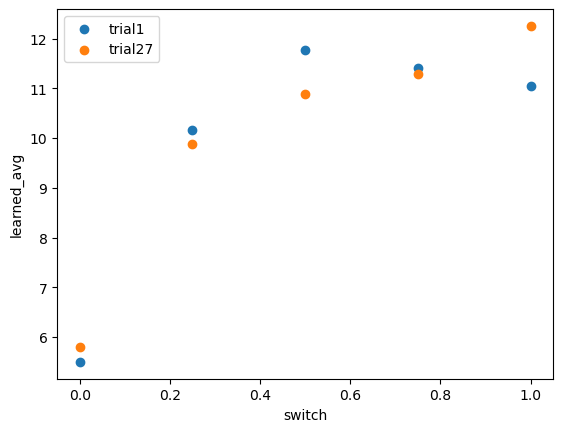

In [7]:
group1 = df[df['trial'] == 1]
group2 = df[df['trial'] == 27]


ex1_group =group1.groupby(by='switch').mean()
quick_plot(ex1_group.index.to_list(), ex1_group['total_learned'].to_list(),'switch','learned_avg')
ex2_group =group2.groupby(by='switch').mean()
quick_plot(ex2_group.index.to_list(), ex2_group['total_learned'].to_list(),'switch','learned_avg')
plt.legend(['trial1','trial27'])

**We can create three groups**: switch = [0, 0.25, >0.25] 

-257


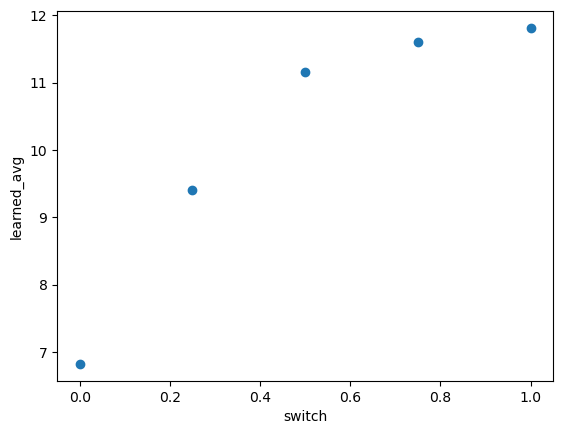

In [8]:
print(df[df['switch'] > 0].shape[0] - df.shape[0])
all_trials = df.groupby(by='switch').mean()
quick_plot(all_trials.index,all_trials['total_learned'],'switch','learned_avg')

In [11]:
print(np.sort(df[df['skewed'] == 0]['total_learned'].unique()))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


**Measure of attention?** 

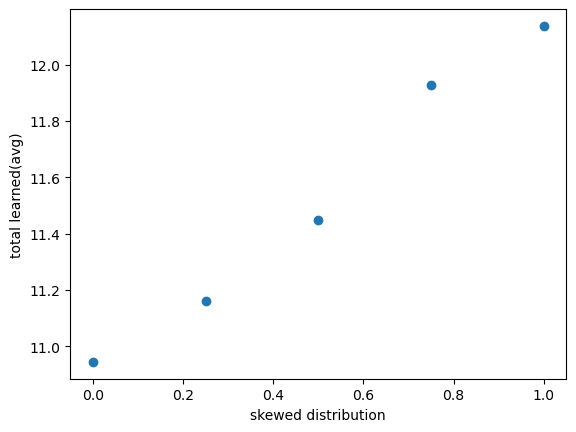

In [17]:
df_filtered = df[df['switch'] > 0.25]

all_skews = df_filtered.groupby(by='skewed').mean()
quick_plot(all_skews.index,all_skews['total_learned'],'skewed distribution','total learned(avg)')

In [12]:
print(np.sort(df[df['skewed'] == 0]['total_learned'].unique()))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


**Outliers** - more fixations on the target pre onset should -> mean correctness, if not then where do these learners still that correctness

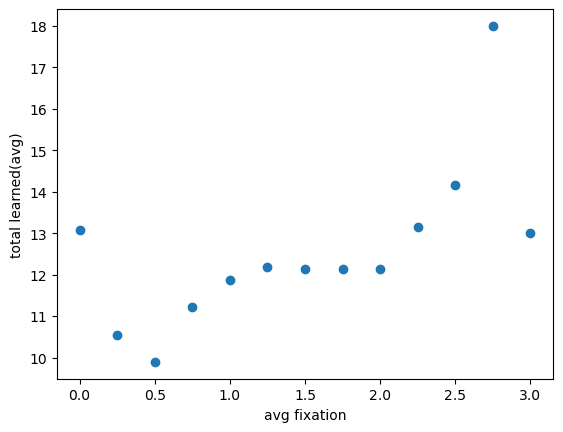

In [23]:
right_fixations = df_filtered.groupby(by='preLabelWindowCount').mean()
quick_plot(right_fixations.index,right_fixations['total_learned'],'avg fixation','total learned(avg)')

Zoom in to those individual differences, track a label# and its correctness measures across trials to see how the learner overcompensated if corrrectness measures were not what we would expect, eg if skewed was 0 when was what other measures were more present 

In [6]:
def quick_plot(x,y,xl,yl):
    plt.scatter(x,y)
    plt.xlabel(xl)
    plt.ylabel(yl)